In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [52]:
import cv2
import extcolors

from colormap import rgb2hex

Resizing the image

C:\Users\levie\AppData\Local\Temp\ipykernel_1808\2347093914.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


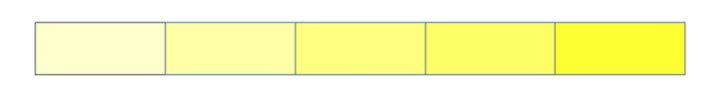

In [53]:
input_name = 'color.png'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

Color extraction

In [54]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 0, limit = 50)
colors_x

([((255, 255, 255), 31946),
  ((255, 255, 51), 9540),
  ((255, 255, 127), 9499),
  ((255, 255, 204), 9440),
  ((255, 255, 168), 9440),
  ((255, 255, 102), 9323),
  ((253, 253, 254), 670),
  ((253, 253, 252), 491),
  ((253, 253, 253), 330),
  ((255, 255, 169), 222),
  ((255, 255, 99), 219),
  ((254, 254, 52), 218),
  ((254, 254, 102), 217),
  ((252, 252, 252), 166),
  ((255, 255, 126), 163),
  ((199, 208, 227), 163),
  ((199, 208, 228), 163),
  ((185, 197, 235), 162),
  ((255, 255, 170), 162),
  ((255, 255, 128), 162),
  ((181, 184, 192), 161),
  ((185, 197, 225), 161),
  ((185, 197, 228), 161),
  ((185, 197, 231), 161),
  ((254, 254, 125), 161),
  ((254, 254, 168), 161),
  ((254, 254, 127), 161),
  ((251, 251, 128), 161),
  ((255, 255, 217), 161),
  ((99, 104, 101), 161),
  ((196, 198, 202), 161),
  ((199, 208, 230), 161),
  ((199, 208, 231), 161),
  ((121, 126, 123), 160),
  ((129, 150, 172), 160),
  ((129, 150, 163), 160),
  ((217, 218, 175), 160),
  ((219, 226, 160), 160),
  ((219, 

In [55]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#FFFFFF,31946
1,#FFFF33,9540
2,#FFFF7F,9499
3,#FFFFCC,9440
4,#FFFFA8,9440
5,#FFFF66,9323
6,#FDFDFE,670
7,#FDFDFC,491
8,#FDFDFD,330
9,#FFFFA9,222


Donut chart

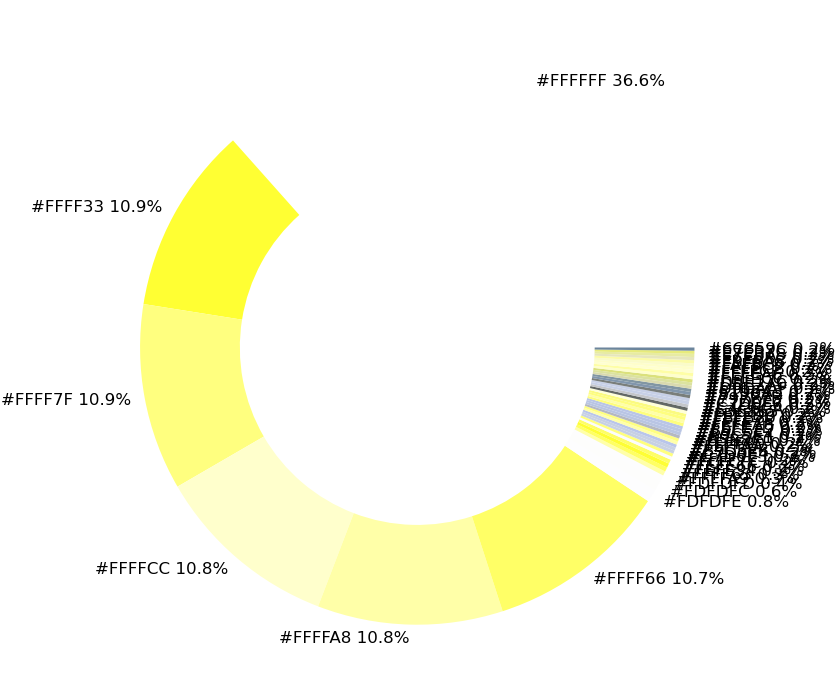

In [56]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

Color palette

C:\Users\levie\AppData\Local\Temp\ipykernel_1808\584855015.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


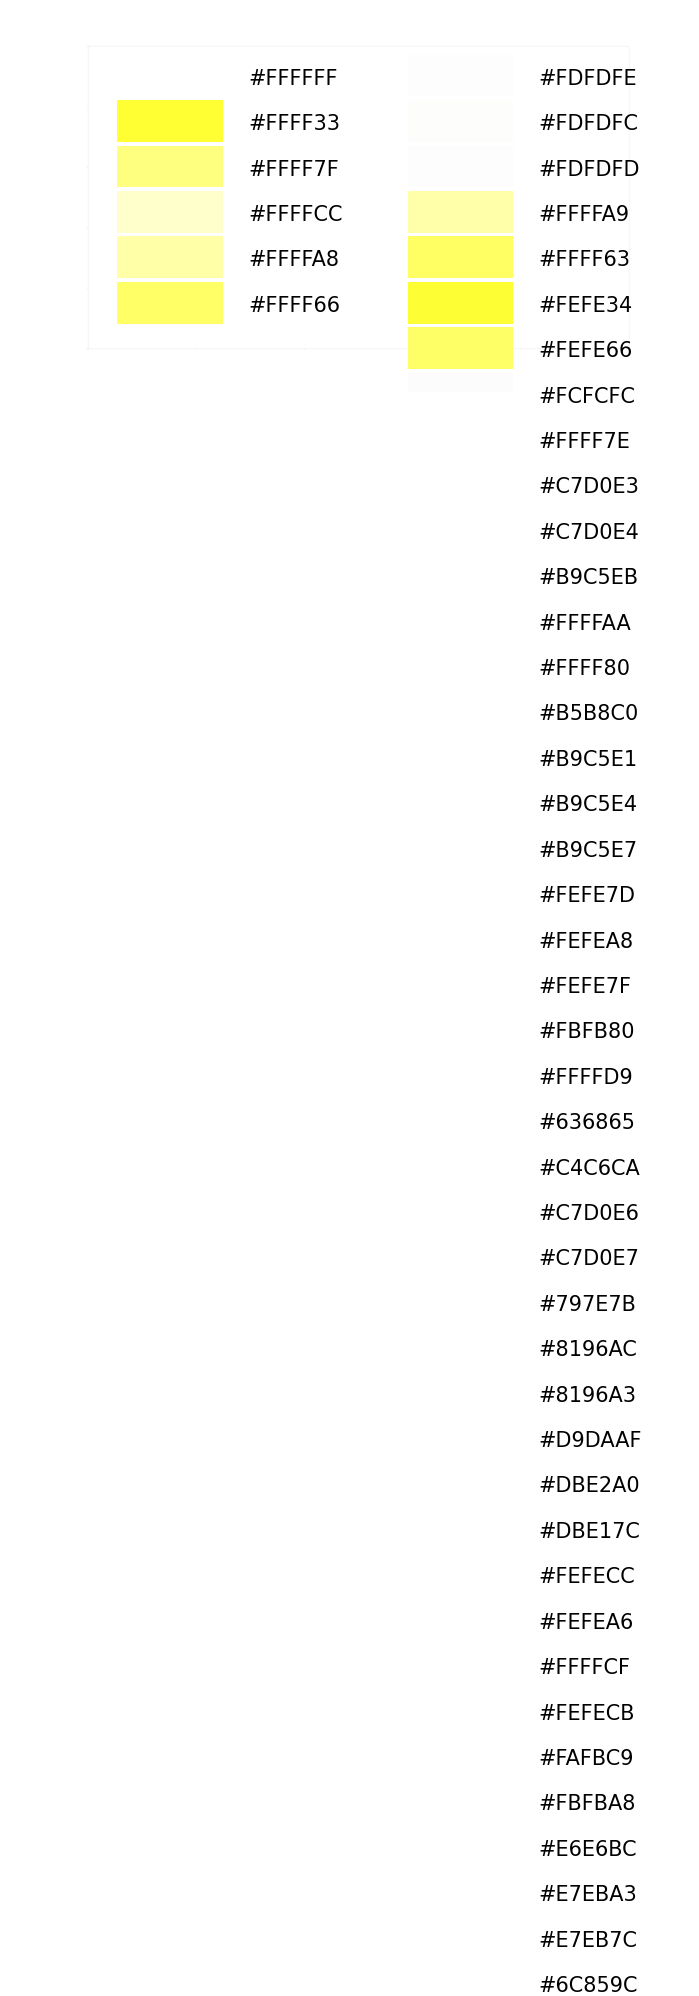

In [57]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

C:\Users\levie\AppData\Local\Temp\ipykernel_1808\3956371893.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


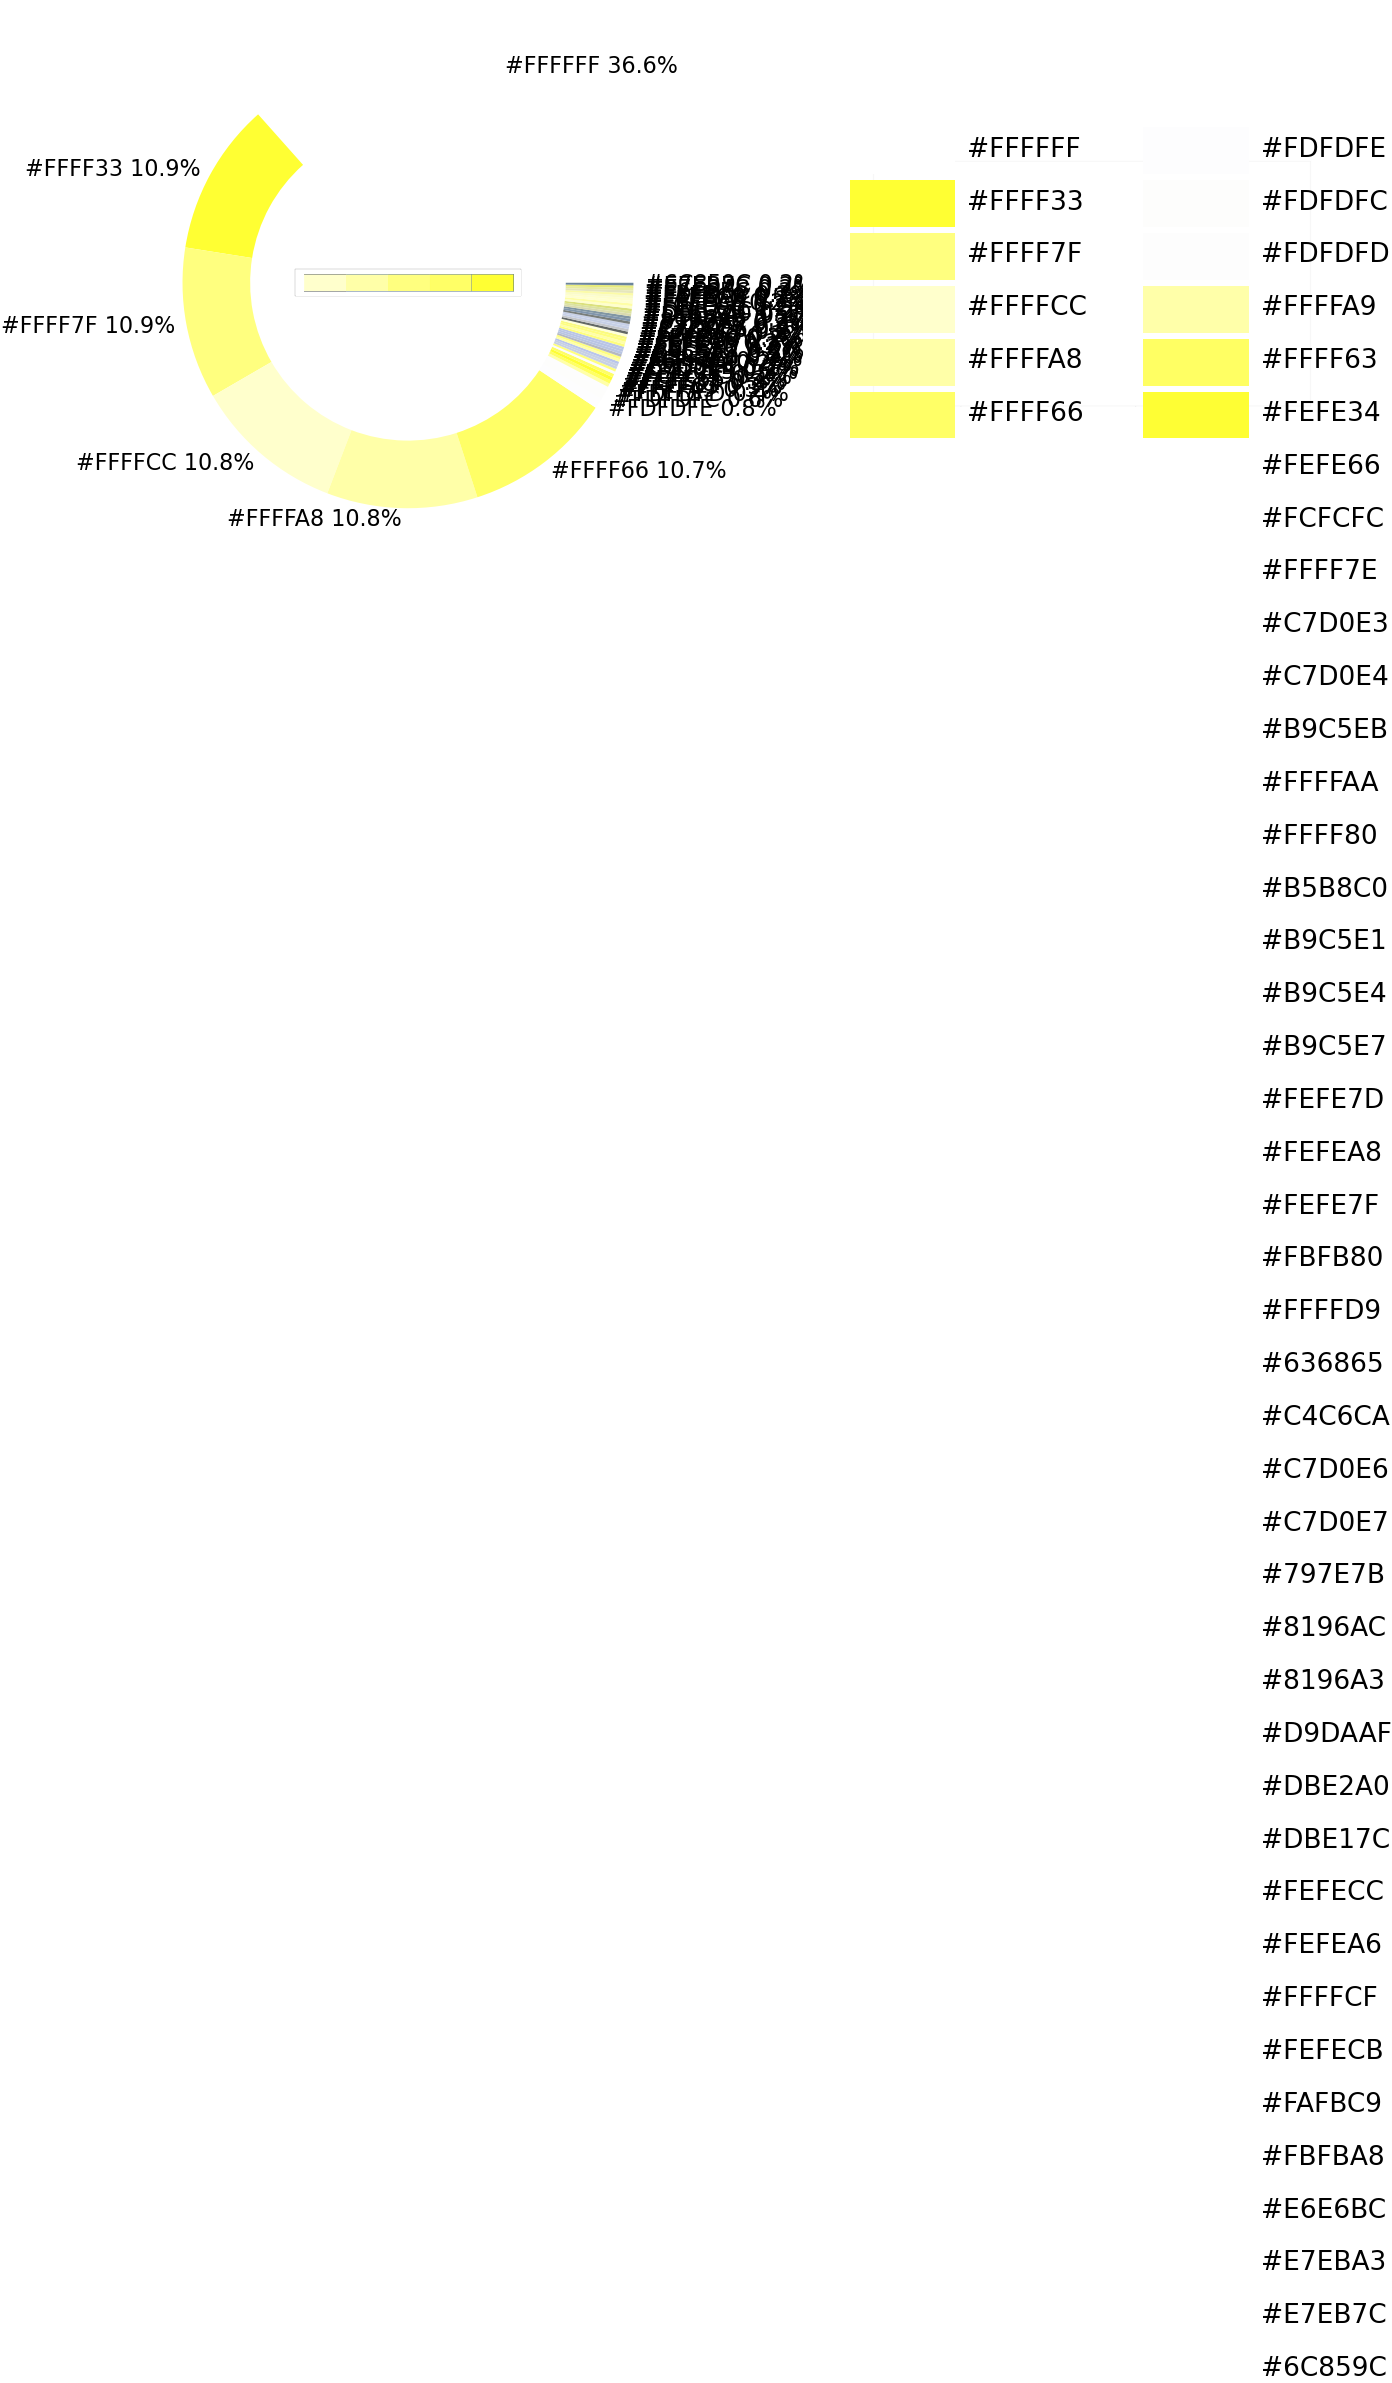

In [58]:
img = mpimg.imread('color.png')
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()